In [1]:
library(Signac)
library(Seurat)
library(ggplot2)
library(EnsDb.Mmusculus.v79)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.i

In [2]:
# load processed data matrices for each assay
rna <- Read10X("/mnt/disk1/xiaojk/data/mousebrain/GSE126074_AdBrainCortex_SNAREseq_rna/", gene.column = 1)
atac <- Read10X("/mnt/disk1/xiaojk/data/mousebrain/GSE126074_AdBrainCortex_SNAREseq_atac/", gene.column = 1)
fragments <- "/mnt/disk1/xiaojk/data/mousebrain/fragments.sort.bed.gz"

# create a Seurat object and add the assays
snare <- CreateSeuratObject(counts = rna)
snare[['ATAC']] <- CreateChromatinAssay(
  counts = atac,
  sep = c(":", "-"),
  genome = "mm10",
  fragments = fragments
)

# extract gene annotations from EnsDb
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79)

# change to UCSC style since the data was mapped to mm10
seqlevels(annotations) <- paste0('chr', seqlevels(annotations))
genome(annotations) <- "mm10"

# add the gene information to the object
Annotation(snare[["ATAC"]]) <- annotations

Computing hash

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this

In [25]:
snare$nCount_RNA

09A_CAGCCCCGCCTT 09A_CGCCTACCATGA 09A_GATGCGCGGCTA 09A_GGTCCGAGTCCT 
            4622             4783             4868             4665 
09A_TCTCCCGGCACC 09A_ACCAAATCTTGT 09A_CTGCTCGAGCAT 09A_CTCCCCCTAGCC 
            4339             4157             3803             3404 
09A_CACGGAATTAGG 09A_ACGGACTACGCT 09A_TTTCCCCATGGC 09A_GCTGCAAGGGAT 
            4081             3228             3712             3830 
09A_TAAGGAAGAGGA 09A_CAGACCTACTTT 09A_AACGGCGTCGGT 09A_CATGTGTCACCC 
            3410             3010             3538             3792 
09A_GACAAGAAGATC 09A_TCTCTTTAGTGC 09A_GACACCCGCACC 09A_CAGAACTGTCAT 
            3369             3819             3881             3078 
09A_AACCCAGGGAGC 09A_AAATTCTTTAGC 09A_GCCCTTGGTCAA 09A_ATTAATCGAGTA 
            3335             4071             3420             3159 
09A_CGGTCCGACTTA 09A_CATGTTCAATAA 09A_TCATGGACGAGG 09A_TATCCTTACCAG 
            4123             3254             2933             3221 
09A_TTTATGTCAACT 09A_GATCTCACGCCC 09A_CTCTCGCTGTAG 09A_TGCACCTGGGGG 
            3237             2926             3275             3861 
09A_AGGTCTCATCAC 09A_AGTAGTGACTAC 09A_GACCTTGGAATA 09A_GCTCAGCATTTA 
            3092             3615             2977             2640 
09A_ATATCTCCGAGC 09A_CTCAACGCAGAA 09A_GCTATGCTCCCG 09A_GCTACAGCGATG 
            3219             2590             2647             2898 
09A_ATATGGGCCGCT 09A_GCTCCAAAGCGG 09A_GGTATCGAAATA 09A_CTCGGGTTTAGC 
            3006             3140             2863             2764 
09A_GCCAGTACCACA 09A_GAGCCATCAATT 09A_GTCTTCTTTCTG 09A_ACGTGGTGACTT 
            2741             2943             4148             2765 
09A_TCGAATCCCGAA 09A_CTGCGACGTGAC 09A_CAGTAGCCCGTT 09A_GAGTAGCACTTC 
            2539             2759             2668             2624 
09A_GAGGTAACCCGA 09A_TGCATAGGTTCC 09A_TCACATTGTGTC 09A_CGTTGTGCCACT 
            2713             2619             2523             3143 
09A_GCGAAAGCCTGC 09A_GTCCAATTCCCA 09A_GATAATATCGCC 09A_CCGGTACTGCCT 
            2383             2831             2543             3205 
09A_ATCAGAAACTAG 09A_AATGGATGGCAC 09A_CGAACATCCTTG 09A_TTGACTGTCACA 
            3127             2478             3537             2701 
09A_TAAATTCCACGG 09A_TGCCGAACAGTT 09A_TCTCGTTAACCA 09A_CTCAGGTATCCT 
            2749             2783             3083             2437 
09A_ATCTCATCCCTT 09A_AGTCCGCGATTC 09A_CCCTTTAACCCC 09A_GCTACTATACCA 
            2799             2453             2520             2660 
09A_CCTCAGGACCGG 09A_AACCGACAATGC 09A_CGTCCACTAATC 09A_GAGTGTCAGTTT 
            2579             2334             2854             2344 
09A_CCACGTCTAGCT 09A_GAATGTGTATTA 09A_CTGTTTCGTTGC 09A_CCAGGCGCCTTT 
            2495             2732             2431             2519 
09A_TATCCAGGTATT 09A_CATCTCAATCTT 09A_TACTGCCTGAGA 09A_ACCAATGTTTGA 
            2656             2811             2374             2491 
09A_AGCCCACCAGTC 09A_AGCTTGCACTGG 09A_GCAATCAGCTAC 09A_TATGTTTACCAC 
            2521             2469             2165             2603 
09A_CGTCTGCATCCA 09A_TTTAGCCTTCAA 09A_AAGAACCTAGGT 09A_CCACGCCAAATA 
            2375             2642             2375             2179 
09A_AAGGTTGTGAAT 09A_AGACTGAGCAAT 09A_CAATATGCTGAG 09A_CGCCTTCCGGGT 
            2535             2545             2331             2419 
09A_CGAGAAATGGCT 09A_CCGGCCCTCCGT 09A_ACTCATGGGAAC 09A_CTCCATTAATAG 
            2496             3252             2849             2413 
09A_CCCCCTACAGGC 09A_TACGCGACATTT 09A_AGTCGGGCCATC 09A_TCTCATTCACCC 
            3057             2103             2177             3158 
09A_GTAGGCGGGAAC 09A_GCCATGACCCCA 09A_CGGGGGTTCGGT 09A_GGCTAGCGGAGA 
            2270             3186             3455             2240 
09A_TATCAAATCCCT 09A_AGAGGTACGCGA 09A_ACAGCCGCCATC 09A_ATAGACTCTTTG 
            2565             2556             1986             2158 
09A_TCGTAACCATGA 09A_TTCTGACACGCA 09A_GCCGCGCCTTAA 09A_TTAAGCATTCAA 
            2445             2012             2926             2523

In [22]:
dim(snare[['ATAC']])

[1] 244544   8055

In [4]:
DefaultAssay(snare) <- "ATAC"
snare <- TSSEnrichment(snare)
snare <- NucleosomeSignal(snare)
snare$blacklist_fraction <- FractionCountsInRegion(
  object = snare,
  assay = 'ATAC',
  regions = blacklist_mm10
)

Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



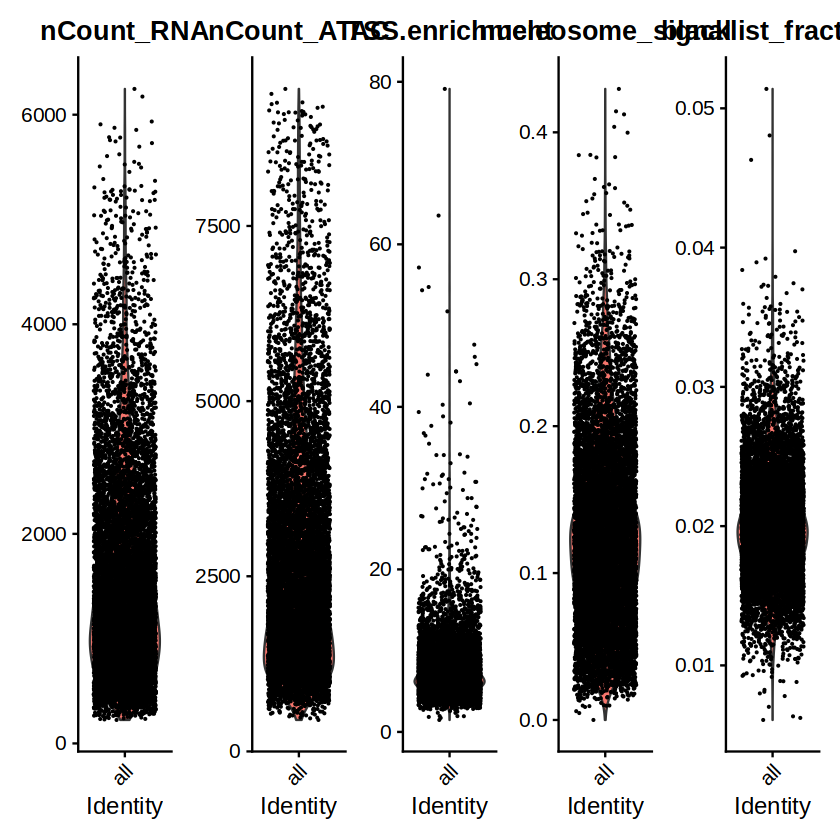

In [5]:
Idents(snare) <- "all"  # group all cells together, rather than by replicate
VlnPlot(
  snare,
  features = c("nCount_RNA", "nCount_ATAC", "TSS.enrichment",
               "nucleosome_signal", "blacklist_fraction"),
  pt.size = 0.1,
  ncol = 5
)

In [6]:
snare <- subset(
  x = snare,
  subset = blacklist_fraction < 0.03 &
    TSS.enrichment < 20 &
    nCount_RNA > 800 &
    nCount_ATAC > 500
)
snare

An object of class Seurat 
277704 features across 8055 samples within 2 assays 
Active assay: ATAC (244544 features, 0 variable features)
 1 other assay present: RNA

In [7]:
DefaultAssay(snare) <- "RNA"

snare <- FindVariableFeatures(snare, nfeatures = 3000)
snare <- NormalizeData(snare)
snare <- ScaleData(snare)
snare <- RunPCA(snare, npcs = 30)
snare <- RunUMAP(snare, dims = 1:30, reduction.name = "umap.rna")
snare <- FindNeighbors(snare, dims = 1:30)
snare <- FindClusters(snare, resolution = 0.5, algorithm = 3)

Centering and scaling data matrix

PC_ 1 
Positive:  Bcan, Slc1a3, Atp1a2, Ptprz1, Ppap2b, Ntsr2, F3, Aldoc, Grin2c, Slco1c1 
	   Mt2, Glul, Mertk, Slc7a10, Mt1, S1pr1, Ndrg2, Prex2, Il18, Luzp2 
	   Apoe, Npas3, Gpr37l1, Htra1, Pla2g7, Fgfr3, Acsbg1, Gjb6, Zbtb20, Daam2 
Negative:  Ptprd, Kcnip4, Lingo2, Hs6st3, Car10, Tenm2, Kcnq5, Opcml, Erc2, Nlgn1 
	   Kcnb2, Fam19a1, Pdzrn3, Cacna2d3, Kctd16, Lrrtm4, Cdh12, Sgcz, Nrxn3, Fstl4 
	   Gria4, Gpr158, Slit3, Prkg1, Ptprk, Unc5d, Prr16, Gm28928, Nwd2, A830036E02Rik 
PC_ 2 
Positive:  Cdh18, Mgat4c, Hs3st4, Foxp2, Zfpm2, Dlc1, Pde4d, Thsd7b, Slc35f1, Htr1f 
	   Me3, Garnl3, Rbfox1, Grik3, A830018L16Rik, Grm8, Etl4, Mctp1, Gabrg3, Ano4 
	   Frmpd4, Nrp1, Pde1a, Zfp804a, Nkain2, Esrrg, Sox5, Nxph1, Nos1ap, Sdk2 
Negative:  Lingo2, Hs6st3, Rorb, Unc5d, Pdzrn3, Fam19a1, Cacna2d3, A830036E02Rik, Atp1a2, Kcnq5 
	   Pde7b, Kcnb2, Prr16, Fam19a2, Kcnh5, Ntm, Cdh12, Car10, Ppap2b, BC030499 
	   Fstl4, Ptprk, Rora, Slc1a3, Ntsr2, Slc7a10, Aldoc, K

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8055
Number of edges: 323944

Running smart local moving algorithm...
Maximum modularity in 10 random starts: 0.8908
Number of communities: 14
Elapsed time: 4 seconds


In [8]:
p1 <- DimPlot(snare, label = TRUE) + NoLegend() + ggtitle("RNA UMAP")

In [9]:
DefaultAssay(snare) <- 'ATAC'

snare <- FindTopFeatures(snare, min.cutoff = 10)
snare <- RunTFIDF(snare)
snare <- RunSVD(snare)
snare <- RunUMAP(snare, reduction = 'lsi', dims = 2:30, reduction.name = 'umap.atac')
p2 <- DimPlot(snare, reduction = 'umap.atac', label = TRUE) + NoLegend() + ggtitle("ATAC UMAP")

Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"
Running SVD

Scaling cell embeddings

20:47:25 UMAP embedding parameters a = 0.9922 b = 1.112

20:47:25 Read 8055 rows and found 29 numeric columns

20:47:25 Using Annoy for neighbor search, n_neighbors = 30

20:47:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:47:26 Writing NN index file to temp file /tmp/RtmpAPdLQW/file37564435215260

20:47:26 Searching Annoy index using 1 thread, search_k = 3000

20:47:28 Annoy recall = 100%

20:47:30 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:47:33 Initializing from normalized Laplacian + noise (using irlba)

20:

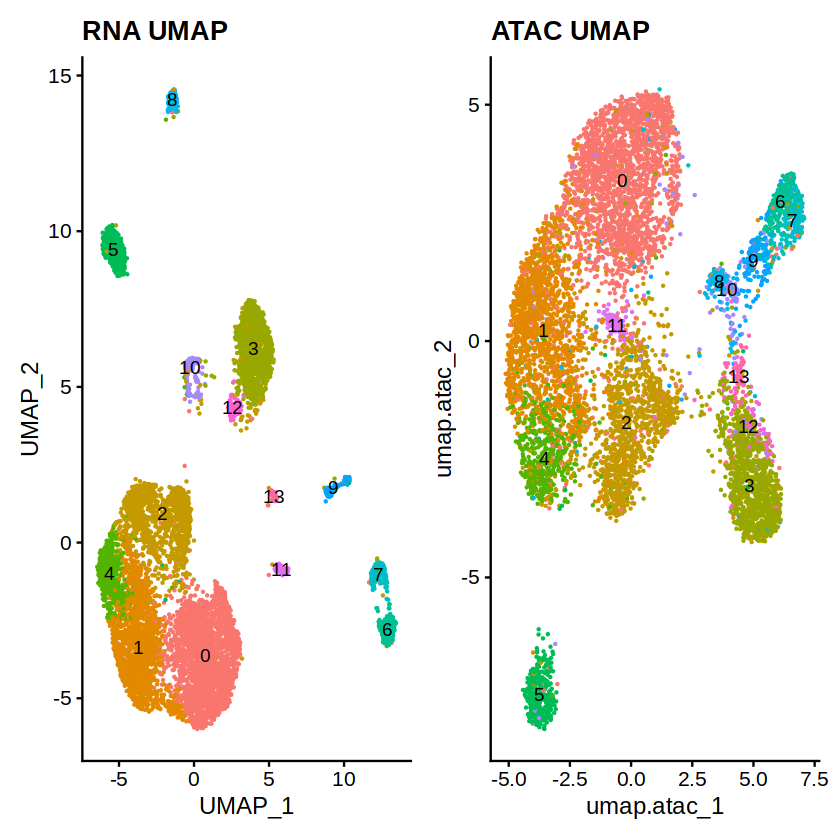

In [10]:
p1 + p2

In [11]:
# label transfer from Allen brain
allen <- readRDS("/mnt/disk1/xiaojk/data/mousebrain/allen_brain.rds")

# use the RNA assay in the SNARE-seq data for integration with scRNA-seq
DefaultAssay(snare) <- 'RNA'

transfer.anchors <- FindTransferAnchors(
  reference = allen,
  query = snare,
  dims = 1:30,
  reduction = 'cca'
)

predicted.labels <- TransferData(
  anchorset = transfer.anchors,
  refdata = allen$subclass,
  weight.reduction = snare[['pca']],
  dims = 1:30
)

snare <- AddMetaData(object = snare, metadata = predicted.labels)

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 13920 anchors

Filtering anchors

	Retained 4867 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



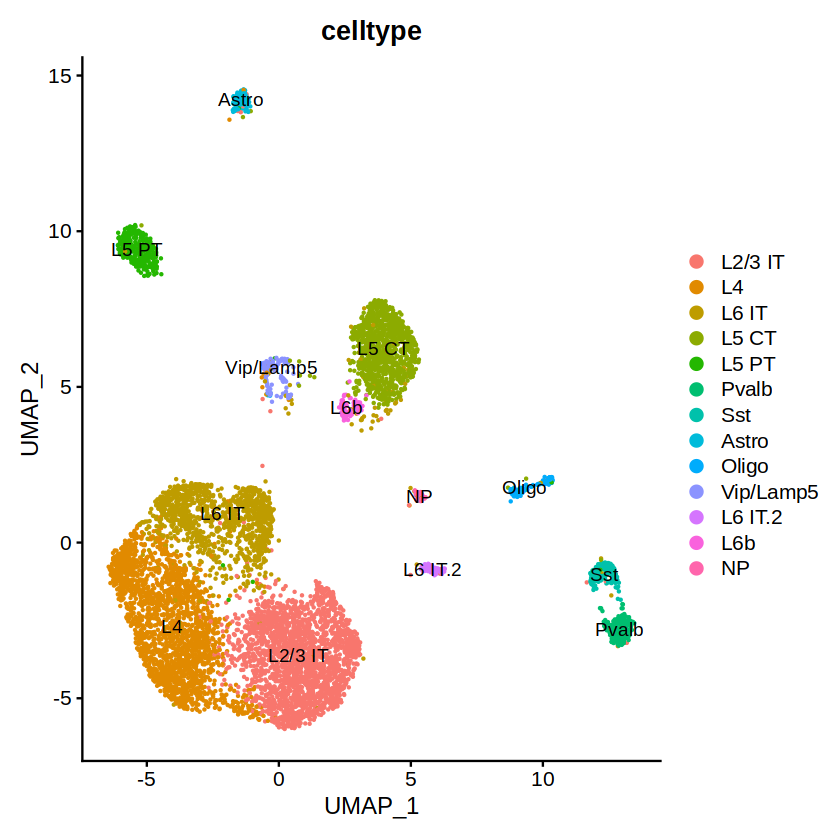

In [12]:
# label clusters based on predicted ID
new.cluster.ids <- c(
  "L2/3 IT",
  "L4",
  "L6 IT",
  "L5 CT",
  "L4",
  "L5 PT",
  "Pvalb",
  "Sst",
  "Astro",
  "Oligo",
  "Vip/Lamp5",
  "L6 IT.2",
  "L6b",
  "NP"
)
names(x = new.cluster.ids) <- levels(x = snare)
snare <- RenameIdents(object = snare, new.cluster.ids)
snare$celltype <- Idents(snare)
DimPlot(snare, group.by = 'celltype', label = TRUE, reduction = 'umap.rna')

Warning message:
"Removed 8 rows containing missing values (`geom_segment()`)."


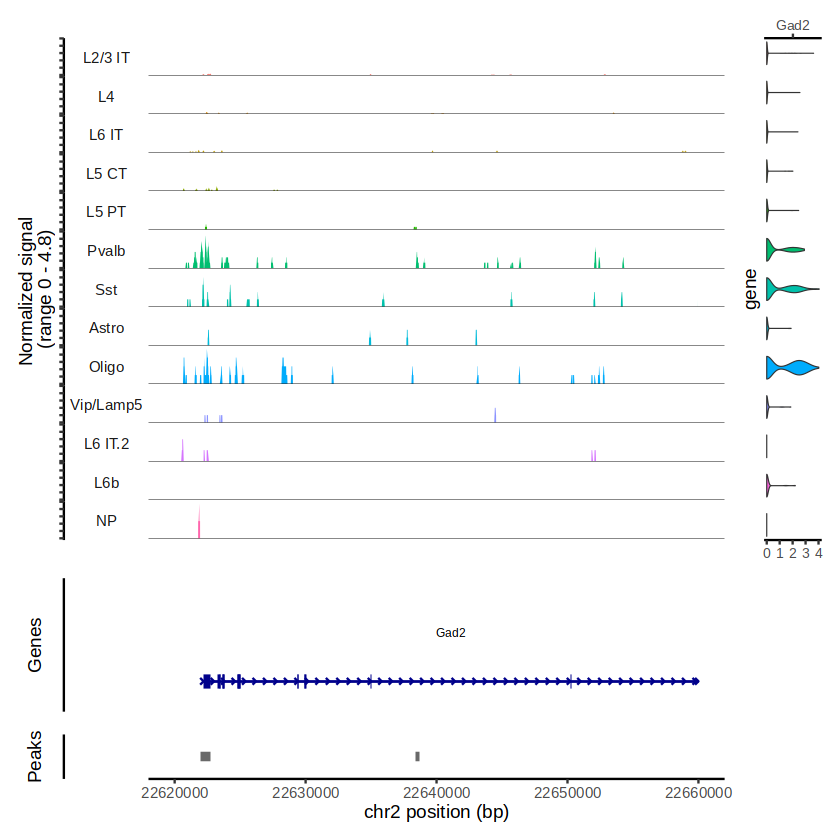

In [13]:
DefaultAssay(snare) <- "ATAC"
CoveragePlot(snare, region = "chr2-22620000-22660000", features = "Gad2")

In [27]:
gene.activities <- GeneActivity(snare)

Extracting gene coordinates

Extracting reads overlapping genomic regions



In [47]:
# add the gene activity matrix to the Seurat object as a new assay and normalize it
snare[['RNA']] <- CreateAssayObject(counts = gene.activities)
snare <- NormalizeData(
  object = snare,
  assay = 'RNA',
  normalization.method = 'LogNormalize',
  scale.factor = median(snare$nCount_RNA)
)

In [48]:
DefaultAssay(snare) <- 'RNA'

In [49]:
seurat_obj <- CreateSeuratObject(counts = snare[['RNA']])

In [50]:
seurat_obj[["RNA"]] <- pbmc[['RNA']]

In [51]:
seurat_obj$celltype <- snare$celltype

In [59]:
seurat_obj$celltype <- as.character(seurat_obj$celltype)

# 查看转换后的celltype列
print(seurat_obj$celltype)

09A_CAGCCCCGCCTT 09A_CGCCTACCATGA 09A_GATGCGCGGCTA 09A_GGTCCGAGTCCT 
       "L2/3 IT"          "L5 PT"          "Astro"          "L6 IT" 
09A_TCTCCCGGCACC 09A_ACCAAATCTTGT 09A_CTGCTCGAGCAT 09A_CTCCCCCTAGCC 
         "L5 PT"          "L6 IT"          "L6 IT"          "L5 PT" 
09A_CACGGAATTAGG 09A_ACGGACTACGCT 09A_TTTCCCCATGGC 09A_GCTGCAAGGGAT 
       "L2/3 IT"             "L4"        "L2/3 IT"          "Pvalb" 
09A_TAAGGAAGAGGA 09A_CAGACCTACTTT 09A_AACGGCGTCGGT 09A_CATGTGTCACCC 
           "L6b"        "L2/3 IT"          "L6 IT"             "L4" 
09A_GACAAGAAGATC 09A_TCTCTTTAGTGC 09A_GACACCCGCACC 09A_CAGAACTGTCAT 
         "L6 IT"          "L6 IT"        "L2/3 IT"        "L2/3 IT" 
09A_AACCCAGGGAGC 09A_AAATTCTTTAGC 09A_GCCCTTGGTCAA 09A_ATTAATCGAGTA 
         "L5 PT"        "L2/3 IT"        "L2/3 IT"        "L2/3 IT" 
09A_CGGTCCGACTTA 09A_CATGTTCAATAA 09A_TCATGGACGAGG 09A_TATCCTTACCAG 
         "L6 IT"             "L4"          "L6 IT"          "Pvalb" 
09A_TTTATGTCAACT 09A_GATCTCACGCCC 

In [61]:
library(SeuratDisk)
filename <- sprintf("/mnt/disk1/xiaojk/data/mousebrain/mousebrain_genescore_matrix(%d.%d).h5Seurat", dim(seurat_obj)[1], dim(seurat_obj)[2])
SaveH5Seurat(seurat_obj, filename = filename)
Convert(filename,dest = "h5ad")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs



In [21]:
celltype<-snare$celltype
df <- data.frame(Name = celltype)
file_path <- "/mnt/disk1/xiaojk/data/mousebrain/ATAC_celltype.txt"
write.table(df, file = file_path, sep = "\t", row.names = TRUE)